In [89]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

##### Читаем датасет

In [90]:
df = pd.read_csv(os.path.join(os.path.abspath('..'), './glass.csv'))

In [91]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

##### Разделяем датафрйем на признаки и метки

In [92]:
labels = df.to_numpy('int')[:,-1]
features = df.to_numpy('float')[:,:-1]

##### Нормализация данных

In [93]:
features = minmax_scale(features)

##### Построение диаграммы рассеивания

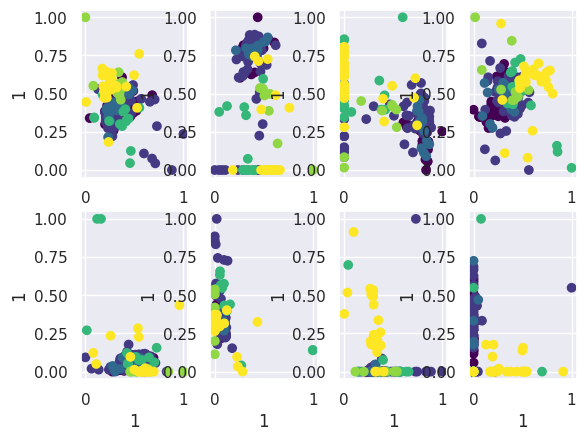

In [94]:
sns.set()
fig, axs = plt.subplots(2, 4)
for i in range(features.shape[1] - 1):
    axs[i // 4, i % 4].scatter(features[:, i],features[:, (i + 1)], c = labels, cmap='viridis')
    axs[i // 4, i % 4].set_xlabel(labels[i])
    axs[i // 4, i % 4].set_ylabel(labels[i + 1])

Понижение размерности методом главных компонент (Principal component analysis)

In [121]:
def get_components(features):
    for n_components in range(len(features[0])):
        pca = PCA(n_components=n_components)
        pca_features = pca.fit(features).transform(features)
        # print(sum(pca.explained_variance_ratio_))
        if sum(pca.explained_variance_ratio_) >= 0.85:
            # continue
            return n_components

In [122]:
n = get_components(features=features)
pca = PCA(n_components=n)
pca_features = pca.fit(features).transform(features)

можно заметить, что 4 компоненты объясняют > 85% данных
Объясненная дисперсия говорит нам, сколько информации (дисперсии) можно отнести к каждому из основных компонентов.В то время как мы можем конвертировать 9-мерное пространство в 4-мерное, мы теряем некоторую дисперсию (информацию) при этом.

In [115]:
pca.explained_variance_ratio_

array([0.45429569, 0.17990097, 0.12649459, 0.09797847])

In [113]:
pca.singular_values_

array([5.1049308 , 3.21245688, 2.69374532, 2.3707507 ])

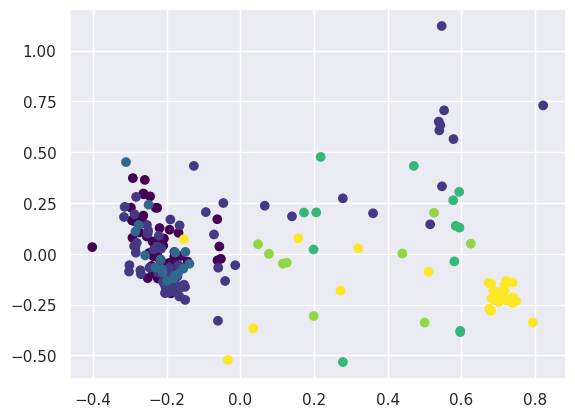

In [114]:
plt.scatter(pca_features[:, 0],
            pca_features[:, 1], c = labels, cmap = 'viridis')